In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm

## EDA

In [3]:
df = pd.read_csv("./data/ten_years_of_earthquakes_TW.csv")
df.head(10)

,number,date,longitude_e,latitude_n,magnitude,depth,location,loc_full,loc_name
0,085,2023-12-31 05:57:10,121.839,24.6018,4.6,49.3,24.60N 121.84E,i.e. 16.3 km SSE of Yilan County(24.60N 121.84E,i.e. 16.3 km SSE of Yilan County)
1,Small area,2023-12-26 08:21:57,121.491,23.0357,3.7,26.6,23.04N 121.49E,i.e. 46.7 km NE of Taitung County(23.04N 121.49E,i.e. 46.7 km NE of Taitung County)
2,Small area,2023-12-26 06:19:24,121.755,24.3803,3.0,6.3,24.38N 121.76E,i.e. 38.8 km S of Yilan County(24.38N 121.76E,i.e. 38.8 km S of Yilan County)
3,Small area,2023-12-25 19:04:24,121.184,23.1407,3.4,14.5,23.14N 121.18E,i.e. 42.8 km N of Taitung County(23.14N 121.18E,i.e. 42.8 km N of Taitung County)
4,Small area,2023-12-25 11:49:35,121.919,24.4283,3.8,29.9,24.43N 121.92E,i.e. 37.1 km SSE of Yilan County(24.43N 121.92E,i.e. 37.1 km SSE of Yilan County)
5,Small area,2023-12-24 17:19:17,121.323,22.6363,4.4,21.0,22.64N 121.32E,i.e. 22.0 km SE of Taitung County(22.64N 121.32E,i.e. 22.0 km SE of Taitung County)
6,Small area,2023-12-24 05:21:18,121.308,22.6452,4.6,19.2,22.65N 121.31E,i.e. 20.2 km SE of Taitung County(22.65N 121.31E,i.e. 20.2 km SE of Taitung County)
7,Small area,2023-12-24 05:07:51,121.303,22.6458,4.5,19.0,22.65N 121.30E,i.e. 19.8 km SE of Taitung County(22.65N 121.30E,i.e. 19.8 km SE of Taitung County)
8,Small area,2023-12-23 10:32:34,122.141,24.2717,4.7,55.1,24.27N 122.14E,i.e. 61.4 km ENE of Hualien County(24.27N 122...,i.e. 61.4 km ENE of Hualien County)
9,Small area,2023-12-22 18:09:31,120.923,23.7777,3.6,28.1,23.78N 120.92E,i.e. 27.5 km ESE of Nantou County(23.78N 120.92E,i.e. 27.5 km ESE of Nantou County)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       6543 non-null   object 
 1   date         6543 non-null   object 
 2   longitude_e  6543 non-null   float64
 3   latitude_n   6543 non-null   float64
 4   magnitude    6543 non-null   float64
 5   depth        6543 non-null   float64
 6   location     6543 non-null   object 
 7   loc_full     6543 non-null   object 
 8   loc_name     6543 non-null   object 
dtypes: float64(4), object(5)
memory usage: 460.2+ KB


In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name
df['day'] = df.date.dt.day_name
df['hour'] = df.date.dt.hour


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   number       6543 non-null   object        
 1   date         6543 non-null   datetime64[ns]
 2   longitude_e  6543 non-null   float64       
 3   latitude_n   6543 non-null   float64       
 4   magnitude    6543 non-null   float64       
 5   depth        6543 non-null   float64       
 6   location     6543 non-null   object        
 7   loc_full     6543 non-null   object        
 8   loc_name     6543 non-null   object        
 9   year         6543 non-null   int32         
 10  month        6543 non-null   object        
 11  day          6543 non-null   object        
 12  hour         6543 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(6)
memory usage: 613.5+ KB


In [8]:
df.describe()

,date,longitude_e,latitude_n,magnitude,depth,year,hour
count,6543,6543.000000,6543.000000,6543.000000,6543.000000,6543.000000,6543.000000
mean,2018-04-18 20:37:33.409903872,121.412451,23.768137,3.706144,19.335672,2017.829742,11.431148
min,2013-01-01 03:00:53,118.520000,19.299500,1.300000,0.600000,2013.000000,0.000000
25%,2015-09-16 04:11:44,121.146500,23.260000,3.200000,8.500000,2015.000000,5.000000
50%,2018-02-07 09:42:35,121.503000,23.920000,3.600000,13.500000,2018.000000,11.000000
75%,2021-05-14 08:20:48,121.730000,24.260000,4.100000,21.600000,2021.000000,18.000000
max,2023-12-31 05:57:10,125.583000,25.986200,6.900000,268.600000,2023.000000,23.000000
std,NaN,0.523019,0.677398,0.745917,20.526199,3.182667,7.063549


### Outliers and duplicates

First I'm going to plot all the registered earthquakes in the dataset.

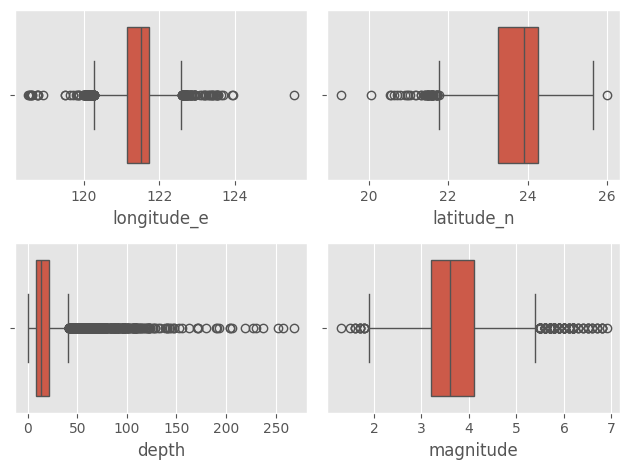

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2,2)

sns.boxplot(x=df['longitude_e'], ax=ax[0,0])
sns.boxplot(x=df['latitude_n'], ax = ax[0,1])
sns.boxplot(x=df['depth'], ax = ax[1,0])
sns.boxplot(x=df['magnitude'], ax = ax[1,1])


plt.tight_layout()


Let's see how do these variables look like if we only exclude all the local earthquakes. 

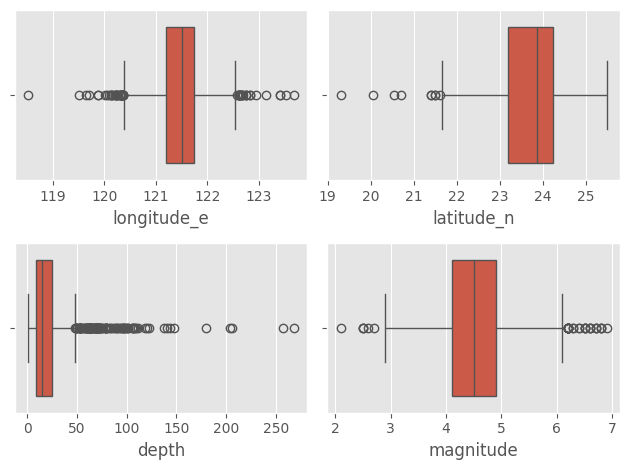

In [31]:
fig, ax = plt.subplots(2,2)

sns.boxplot(x=df[df['number']!='Small area']['longitude_e'], ax=ax[0,0])
sns.boxplot(x=df[df['number']!='Small area']['latitude_n'], ax = ax[0,1])
sns.boxplot(x=df[df['number']!='Small area']['depth'], ax = ax[1,0])
sns.boxplot(x=df[df['number']!='Small area']['magnitude'], ax = ax[1,1])


plt.tight_layout()

### Distribution by county

In [10]:
#Extract the county from the loc_ful column

df['county'] = df['loc_name'].str.split(' ').apply(lambda x: x[-2])


In [11]:
# Add a region column 
def region(x):
    if x in ['Yilan', 'Hualien', 'Taitung']:
        return 'East'
    elif x in [ 'Taipei', 'Taoyuan', 'Keelung', 'Hsinchu']:
        return 'North'
    elif x in [ 'Taichung', 'Changhua', 'Nantou', 'Chiayi', 'Yunlin' ]:
        return 'Center'
    elif x in ['Kaohsiung', 'Tainan', 'Pintung']:
        return 'South'
    else :
        return 'Islands'
    
df['region'] = df['county'].apply(region)

In [12]:
df['region'].value_counts()

region
East       5186
Center      696
South       335
Islands     165
North       161
Name: count, dtype: int64

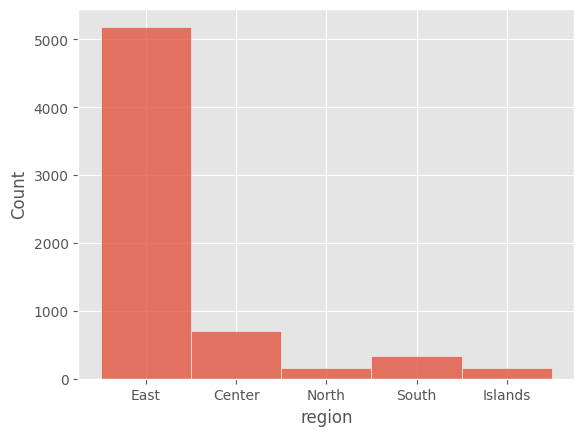

In [42]:
sns.histplot(data=df, x='region')
plt.show()

In [14]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False).index.to_list()

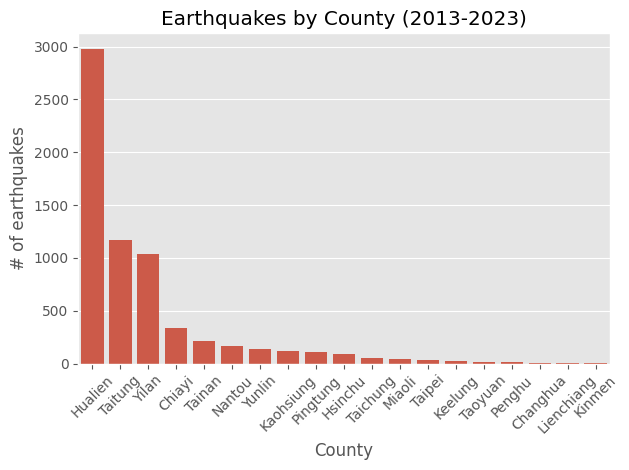

In [43]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False)
sns.barplot(data=counties)

plt.xticks(rotation=45)
plt.ylabel('# of earthquakes')
plt.xlabel('County')
plt.title('Earthquakes by County (2013-2023)')
plt.tight_layout()
plt.show()

In [54]:
mu_s, std_s = norm.fit(df[df['number']=='Small area']['magnitude'])
mu_s, std_s

mu_b, std_b = norm.fit(df[df['number']!='Small area']['magnitude'])
mu_b, std_b

df['area'].value_counts()

(4.545091779728652, 0.7108341347706177)

In [70]:
factor_b = df['area'].value_counts()[1]/df.shape[0]
factor_s = df['area'].value_counts()[0]/df.shape[0]

/tmp/ipykernel_42905/1504373096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_b = df['area'].value_counts()[1]/df.shape[0]
/tmp/ipykernel_42905/1504373096.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_s = df['area'].value_counts()[0]/df.shape[0]


In [60]:
df['area']=df['number']

df.loc[df['number']=='Small area','area'] = 'Small area'
df.loc[df['number']!='Small area','area'] = 'Big area'

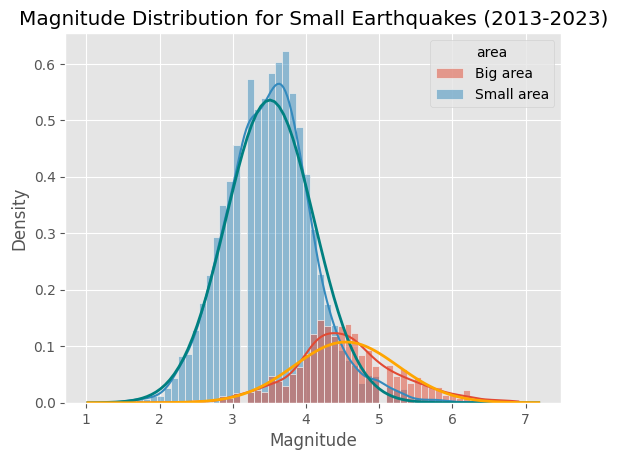

In [75]:
ax = sns.histplot(data=df, x='magnitude',kde=True, stat='density', hue='area')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_s, std_s)*factor_s
q = norm.pdf(x, mu_b, std_b)*factor_b
plt.plot(x, p,linewidth=2 ,color = 'teal')
plt.plot(x, q, linewidth=2, color = 'orange')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Magnitude Distribution for Small Earthquakes (2013-2023)')
plt.show()

### Calculate seismic center

I will define *seismic senter* as the average location of all the earthquakes in that year. Knowing that the magnitude scale used is logarithmic (one point increase in magnitude implies 10 times more energy released), the average will be weighted by the exponential of the magnitude. 

In [18]:
def w_average(df, variable, column):
    w_avg_lat = []
    
    for i in range(2013, 2024, 1):
        weight_list = np.exp(df[df['year'] == i][column])
        w_avg_lat.append(np.average(df[df['year'] == i][variable], weights=weight_list))

    return w_avg_lat

### Seismic center drift

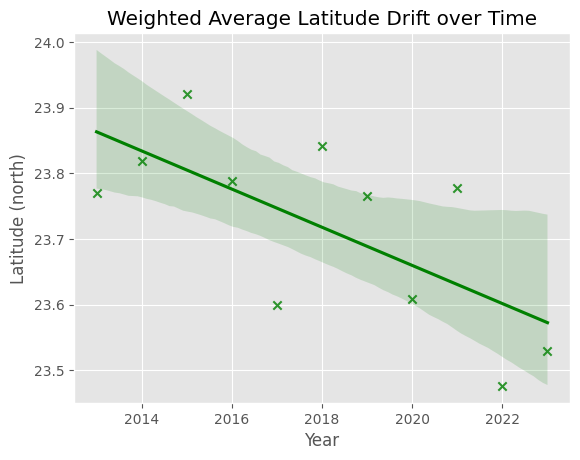

In [ ]:
sns.regplot(x=list(range(2013, 2024)), y=w_average(df, 'latitude_n', 'magnitude'), marker='x',color='green')
plt.title('Weighted Average Latitude Drift over Time')
plt.xlabel('Year')
plt.ylabel('Latitude (north)')
plt.show()

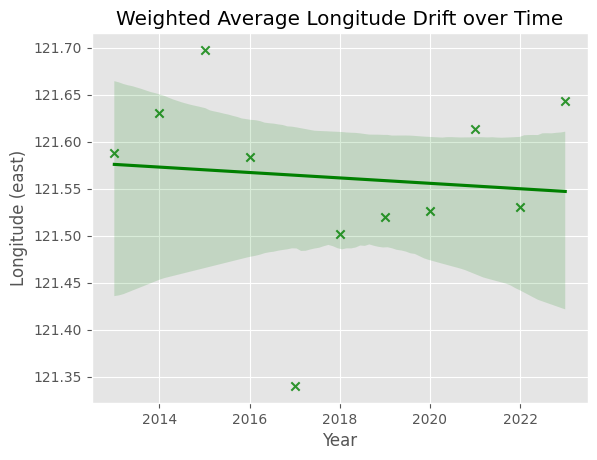

In [ ]:
sns.regplot(x=list(range(2013, 2024)), y=w_average(df, 'longitude_e', 'magnitude'),marker='x', color='green')
plt.title('Weighted Average Longitude Drift over Time')
plt.xlabel('Year')
plt.ylabel('Longitude (east)')
plt.show()

### Relationship between depth and magnitude

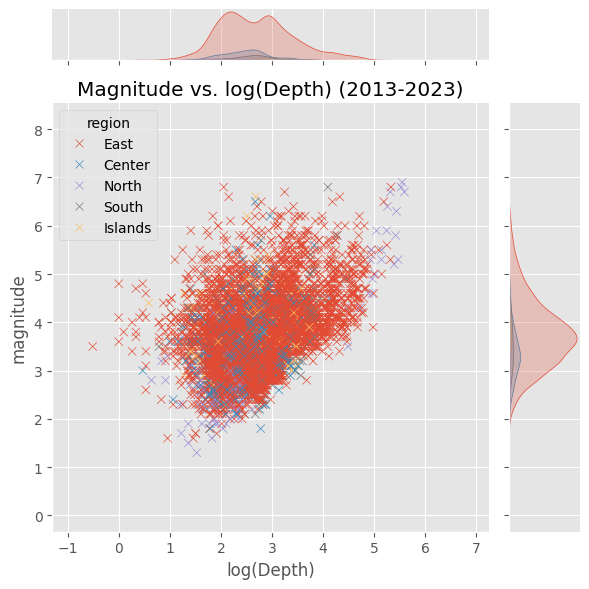

In [ ]:
sns.jointplot(
    x=np.log(df['depth']), 
    y=df['magnitude'], 
    marker='x', 
    hue= df['region'],
    kind='scatter',
    marginal_kws={'color':'teal'})

plt.title('Magnitude vs. log(Depth) (2013-2023)')
plt.xlabel('log(Depth)')
plt.tight_layout()
plt.show()

### Yearly distribution of earthquakes

<Axes: xlabel='date', ylabel='Count'>

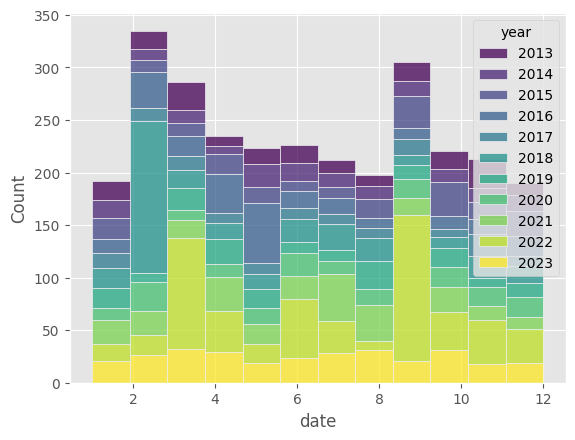

In [ ]:
sns.histplot(x=df[df['magnitude'] >= mu]['date'].dt.month, bins=12, hue=df['year'], multiple='stack', palette='viridis')